## Programas para todos los apartados


Como para muchos apartados se pide que se estudie lo mismo, así agrupo los programas en uno y menos lío.

#### Descripción del programa:

Se usa el programa en c de cada apartado. En todos los apartados es básicamente el mismo, solo que cambio las cosas que dice cada apartado.

El notebook es para TODOS el mismo, ya que coge los datos de las rutas especificadas o de la misma carpeta. Esto facilita el uso del programa a la hora de hacer muchos histogramas, videos o demás ploteos.

Dicho esto, comencemos con el programa.




### 1º Programa: animar N partículas para una caja de lado L

Este programa sirva para hacer la animación de todas las partículas dentro de la caja. Para ello cojemos los datos de posiciones.txt y lo ploteamos. El programa pondrá un punto en cada posición y con un paso temporal lo suficientemente pequeño lo veremos continuo.

Este programa es visual, podemos observar la atracción pero sobretodo la repulsión de las partículas entre ellas.

Para ello defino una función que lea el archivo en cuestión (posiciones.txt) y otra función que las anime.

Con copilot (a parte de ayudarme con las autocompletaciones y comentarios) he implementado una opción para hacer video o gif, según el tiempo que tenga para hacer el ploteo de la animación.

NECESITA:

- posiciones.txt
- N
- L

Suelta:

- simulacion_N_L.mp4 o un gif.


C:\Users\diego\AppData\Local\Temp\ipykernel_11808\2347788365.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Video guardado como 'simulacion_N20_L10.0.mp4'.


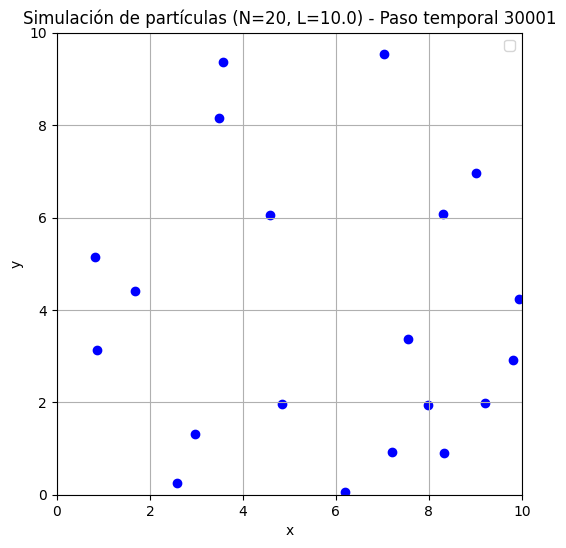

In [16]:
#FUNCION PARA ANIMAR LAS PARTICULAS

#ANCHO DE LA CAJA:

L=10.0
N=20



import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.animation as animation

# Función para leer las posiciones
def leer_posiciones(filename):
    posiciones = []  # Lista para almacenar las posiciones de cada paso temporal

    with open(filename, 'r') as file:
        paso_actual = []  

        for linea in file:
            linea = linea.strip()
            if linea:  
                datos = linea.split(",")  
                r1x, r1y = float(datos[0]), float(datos[1])  
                paso_actual.append((r1x, r1y))
            else:  
                if paso_actual:  
                    posiciones.append(paso_actual)
                    paso_actual = []  

        # Añadimos el último paso si no está vacío
        if paso_actual:
            posiciones.append(paso_actual)

    return posiciones

# Función para crear la animación
def crear_animacion(posiciones, caja_lado=L, intervalo=1, guardar_gif=False, guardar_video=False):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, caja_lado)
    ax.set_ylim(0, caja_lado)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"Simulación de partículas (N={N}, L={L})")
    scatter = ax.scatter([], [], c='blue')
    ax.legend()
    ax.grid(True)


    # Función para actualizar los datos en cada frame
    def actualizar(frame):
        paso = posiciones[frame]
        x = [pos[0] for pos in paso]
        y = [pos[1] for pos in paso]
        scatter.set_offsets(list(zip(x, y)))
        ax.set_title(f"Simulación de partículas (N={N}, L={L}) - Paso temporal {frame + 1}")


    # Crear la animación
    anim = FuncAnimation(fig, actualizar, frames=len(posiciones), interval=intervalo)

    # Guardar como GIF
    if guardar_gif:
        gif_writer = PillowWriter(fps=1000 // intervalo)
        anim.save(f"simulacion_N{N}_L{L}.gif", writer=gif_writer)
        print(f"GIF guardado como 'simulacion_N{N}_L{L}.gif'.")

    # Guardar como video
    if guardar_video:
        video_writer = animation.FFMpegWriter(fps=1000 // intervalo)
        anim.save(f"simulacion_N{N}_L{L}.mp4", writer=video_writer)
        print(f"Video guardado como 'simulacion_N{N}_L{L}.mp4'.")

    plt.show()

# Uso el programa
if __name__ == "__main__":
    archivo = "SALIDA.txt"  
    posiciones = leer_posiciones(archivo)


    # Cambia guardar_gif o guardar_video a True si deseas guardar la animación
    crear_animacion(posiciones, caja_lado=L, intervalo=1, guardar_gif=False, guardar_video=True)

### 2º Programa: Ploteo de energía


#### 2.1 Ploteo fijo de la energía

Este programa coge los datos de energia.txt y plotea 3 curvas, la energía cinética, potencial y total.
Toma solo una imagen por lo que es increblemente rápido.

Necesita:
- energia.txt
- N
- L

Suelta:
- Energia_N_L.png

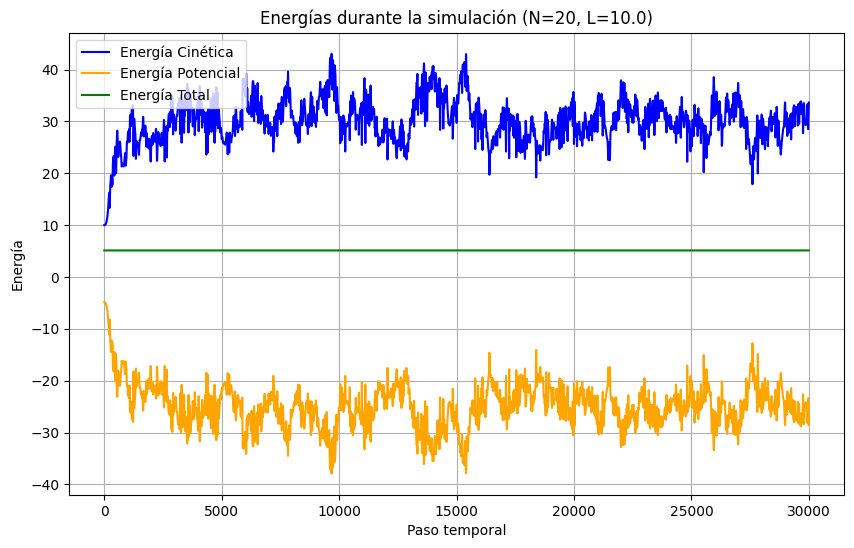

In [11]:
# PLOT DE ENERGIA


#PON LAS DIMENSIONES

L=10.0
N=20

import matplotlib.pyplot as plt

# Función para leer los datos de energía desde el archivo
def leer_energia(filename):
    energia_cinetica = []
    energia_potencial = []
    energia_total = []

    with open(filename, 'r') as file:
        for linea in file:
            datos = linea.strip().split(",")
            if len(datos) == 3:  # Asegurarse de que haya tres columnas
                energia_cinetica.append(float(datos[0]))
                energia_potencial.append(float(datos[1]))
                energia_total.append(float(datos[2]))

    return energia_cinetica, energia_potencial, energia_total

# Función para graficar las energías
def graficar_energias(energia_cinetica, energia_potencial, energia_total):
    pasos = range(len(energia_cinetica))  

    plt.figure(figsize=(10, 6))
    plt.plot(pasos, energia_cinetica, label="Energía Cinética", color="blue")
    plt.plot(pasos, energia_potencial, label="Energía Potencial", color="orange")
    plt.plot(pasos, energia_total, label="Energía Total", color="green")
    plt.xlabel("Paso temporal")
    plt.ylabel("Energía")
    plt.title(f"Energías durante la simulación (N={N}, L={L})")  # Título con N y L
    plt.legend()
    plt.grid(True)
    plt.savefig(f"Energia_N{N}_L{L}.png")  # Nombre del archivo con N y L
    plt.show()



##############   LO USAMOS       ####################

if __name__ == "__main__":
    archivo = "energia.txt"  # Nombre del archivo de energía
    energia_cinetica, energia_potencial, energia_total = leer_energia(archivo)

    
    graficar_energias(energia_cinetica, energia_potencial, energia_total)

#### 2.2 Animación de energía.

Este programa hace una animación para ver cómo evoluciona la energía poco a poco y más visual.

Tarda muchísimo y solo es recomendable usarlo en casos cortos.

Necesita:
- energia.txt
- N
- L

Suelta:
- Energia_animacion.mp4


In [ ]:
###SI QUIERES ANIMACIÓN DE ENERGÍA###

#PON LAS DIMENSIONES

L=10.0
N=20


import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Función para leer los datos de energía desde el archivo
def leer_energia(filename):
    energia_cinetica = []
    energia_potencial = []
    energia_total = []

    with open(filename, 'r') as file:
        for linea in file:
            datos = linea.strip().split(",")
            if len(datos) == 3:  # Asegurarse de que haya tres columnas
                energia_cinetica.append(float(datos[0]))
                energia_potencial.append(float(datos[1]))
                energia_total.append(float(datos[2]))

    return energia_cinetica, energia_potencial, energia_total

# Función para crear la animación
def crear_animacion_energia(energia_cinetica, energia_potencial, energia_total, intervalo=100, guardar_video=True):
    fig, axs = plt.subplots(3, 1, figsize=(8, 12))

    # Configuración de los subplots
    axs[0].set_title("Energía Cinética")
    axs[0].set_xlabel("Paso temporal")
    axs[0].set_ylabel("Energía Cinética")
    axs[0].grid(True)

    axs[1].set_title("Energía Potencial")
    axs[1].set_xlabel("Paso temporal")
    axs[1].set_ylabel("Energía Potencial")
    axs[1].grid(True)

    axs[2].set_title("Energía Total")
    axs[2].set_xlabel("Paso temporal")
    axs[2].set_ylabel("Energía Total")
    axs[2].grid(True)

    # Líneas para los gráficos
    line1, = axs[0].plot([], [], label="Energía Cinética", color="blue")
    line2, = axs[1].plot([], [], label="Energía Potencial", color="orange")
    line3, = axs[2].plot([], [], label="Energía Total", color="green")

    # Función para inicializar los gráficos
    def init():
        for ax in axs:
            ax.set_xlim(0, len(energia_cinetica))
            ax.set_ylim(min(min(energia_cinetica), min(energia_potencial), min(energia_total)) * 0.9,
                        max(max(energia_cinetica), max(energia_potencial), max(energia_total)) * 1.1)
        return line1, line2, line3

    # Función para actualizar los gráficos en cada frame
    def actualizar(frame):
        x = list(range(frame + 1))
        line1.set_data(x, energia_cinetica[:frame + 1])
        line2.set_data(x, energia_potencial[:frame + 1])
        line3.set_data(x, energia_total[:frame + 1])
        return line1, line2, line3

    # Crear la animación
    anim = FuncAnimation(fig, actualizar, frames=len(energia_cinetica), init_func=init, interval=intervalo, blit=True)

    # Guardar como video si se solicita
    if guardar_video:
        video_writer = FFMpegWriter(fps=1000 // intervalo)
        anim.save("energia_animacion.mp4", writer=video_writer)
        print("Video guardado como 'energia_animacion.mp4'.")

    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo = "energia.txt"  # Nombre del archivo de energía
    energia_cinetica, energia_potencial, energia_total = leer_energia(archivo)

    # Crear la animación
    crear_animacion_energia(energia_cinetica, energia_potencial, energia_total, intervalo=10, guardar_video=True)

### 3º Programa: Histogramas.

A continuación se presentan varios programas, todos ellos hacen prácticamente lo mismo, grafican un histograma de velocidades a una temperatura T fija. Las curvas se reescalan para que los máximos coincidan.

#### 3.1 Histograma del módulo v.

Este programa aproxima el histograma a una curva de Maxwell definida en el mismo programa: 
$$
\begin{equation}
P(V)=\left(\frac{m}{k_B T} \right)ve^{\frac{-mv^2}{2k_BT}}
\end{equation}

$$

Necesita:
- histograma.txt
- T

Suelta:
- Histograma_V_T(valor).png

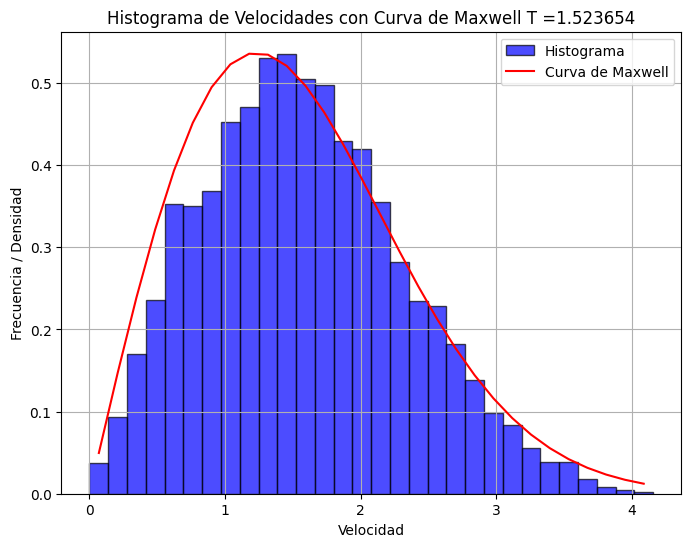

In [12]:
#HISTOGRAMA DE VELOCIDAD V: PON LA TEMPERATURA



T=1.523654

import matplotlib.pyplot as plt
import numpy as np



# Función para leer los datos del archivo histograma.txt
def leer_datos_histograma(filename):
    datos = []
    with open(filename, 'r') as file:
        for linea in file:
            columna = linea.strip().split()[0]  # Leer solo la primera columna
            datos.append(float(columna))  # Convertir a número flotante
    return datos

# Función para graficar el histograma y superponer una curva de Maxwell
def graficar_histograma_con_curva(datos_histograma, curva_funcion=None):
    plt.figure(figsize=(8, 6))

    # Graficar el histograma normalizado
    conteo, bins, _ = plt.hist(datos_histograma, bins=30, density=True, color='blue', edgecolor='black', alpha=0.7, label='Histograma')

    # Calcular el centro de cada barra del histograma
    bins_centro = (bins[:-1] + bins[1:]) / 2

    # Graficar la curva de Maxwell si se proporciona una función
    if curva_funcion:
        curva = curva_funcion(bins_centro)
        # Escalar la curva para que coincida con el histograma
        escala = max(conteo) / max(curva)
        plt.plot(bins_centro, curva * escala, color='red', label='Curva de Maxwell')

    # Personalización del gráfico
    plt.xlabel('Velocidad')
    plt.ylabel('Frecuencia / Densidad')
    plt.title(f'Histograma de Velocidades con Curva de Maxwell T ={T}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"Histograma_V_T{T}.png")
    plt.show()

####### LO USAMOS ######
if __name__ == "__main__":
    archivo_histograma = "histograma.txt"  # Nombre del archivo del histograma

    # Leer los datos
    datos_histograma = leer_datos_histograma(archivo_histograma)

    # Definir la función para la curva de distribución de Maxwell
    def curva_maxwell(v):
        m = 1.0  
        k_B = 1.0 
        
        return  1/T* v * np.exp(-m * v**2 / (2 * k_B * T))

    # Graficar el histograma con la curva de Maxwell
    graficar_histograma_con_curva(datos_histograma, curva_funcion=curva_maxwell)

#### 3.2 Histograma velocidad Vx.

Ahora en lugar de cogernos el módulo de la velocidad, cogeremos la componente x que cambia que la curva ahora es una gaussiana.
$$
\begin{equation}
P(v_x)=\sqrt{\frac{m}{2\pi k_B T}}ve^{\frac{-mv^2}{2k_BT}}
\end{equation}
$$
Suelta:
- Histograma_Vx_T(valor).png

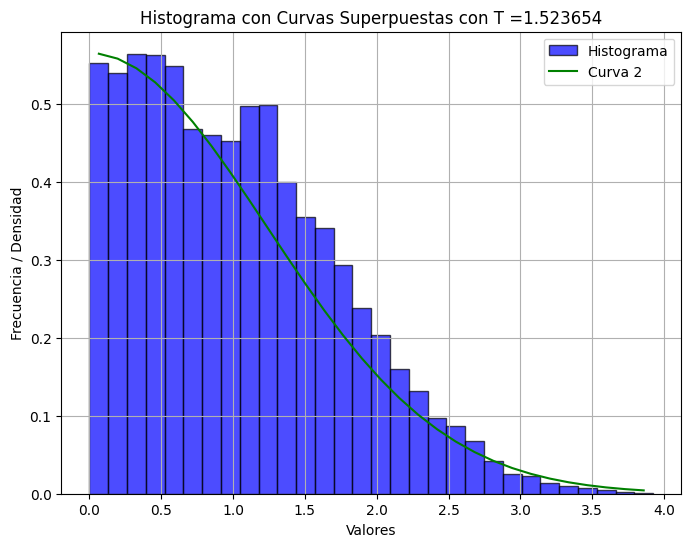

In [13]:
# PARA EL EJE X DEL HISTOGRAMA PON LA TEMPERATURA

T = 1.523654

import matplotlib.pyplot as plt
import numpy as np

# Función para leer los datos del archivo histograma.txt
def leer_datos_histograma(filename, columna_index=0):
    datos = []
    with open(filename, 'r') as file:
        for linea in file:
            columnas = linea.strip().split()  # Dividir por espacios
            if len(columnas) > columna_index:  # Asegurarse de que la columna exista
                datos.append(float(columnas[columna_index]))  # Convertir a número flotante
    return datos

# Función para graficar el histograma y superponer dos curvas
def graficar_histograma_con_curvas(datos_histograma, curva2_funcion=None):
    plt.figure(figsize=(8, 6))

    # Graficar el histograma normalizado
    conteo, bins, _ = plt.hist(datos_histograma, bins=30, density=True, color='blue', edgecolor='black', alpha=0.7, label='Histograma')

    # Calcular el centro de cada barra del histograma
    bins_centro = (bins[:-1] + bins[1:]) / 2

    # Graficar la curva si se proporciona una función
    if curva2_funcion:
        curva2 = curva2_funcion(bins_centro)
        escala2 = max(conteo) / max(curva2)  # Escalar la curva para que coincida con el histograma
        plt.plot(bins_centro, curva2 * escala2, color='green', label='Curva 2')

    # Personalización del gráfico
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia / Densidad')
    plt.title(f'Histograma con Curvas Superpuestas con T ={T}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"Histograma_Vx_T{T}.png")
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo_histograma = "histograma.txt"  # Nombre del archivo del histograma

    # Leer los datos de la segunda columna
    datos_histograma = leer_datos_histograma(archivo_histograma, columna_index=1)

    # Definir las funciones para las curvas
    def curva2(v):
        M=1.0
        KB=1.0
        return np.sqrt(M/(2*np.pi*KB*T)) * np.exp(-M* v**2/(2*KB*T))

    # Graficar el histograma con las dos curvas
    graficar_histograma_con_curvas(datos_histograma, curva2_funcion=curva2)

#### 3.3 Histograma velocidad Vy

Lo mismo de antes pero para la velocidad en el eje Y en vez de la X.

Suelta:
- Histograma_Vy_T(valor).png

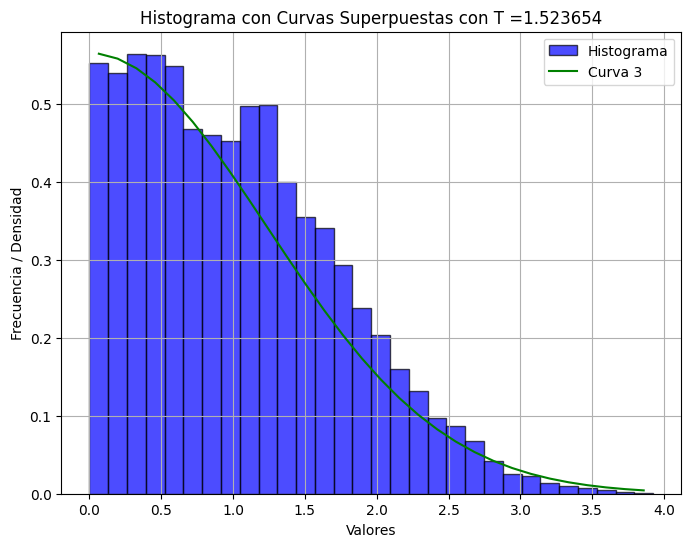

In [14]:
# PARA EL EJE Y DEL HISTOGRAMA PON LA TEMPERATURA

T = 1.523654

import matplotlib.pyplot as plt
import numpy as np

# Función para leer los datos del archivo histograma.txt
def leer_datos_histograma(filename, columna_index=0):
    datos = []
    with open(filename, 'r') as file:
        for linea in file:
            columnas = linea.strip().split()  # Dividir por espacios
            if len(columnas) > columna_index:  # Asegurarse de que la columna exista
                datos.append(float(columnas[columna_index]))  # Convertir a número flotante
    return datos

# Función para graficar el histograma y superponer dos curvas
def graficar_histograma_con_curvas(datos_histograma, curva3_funcion=None):
    plt.figure(figsize=(8, 6))

    # Graficar el histograma normalizado
    conteo, bins, _ = plt.hist(datos_histograma, bins=30, density=True, color='blue', edgecolor='black', alpha=0.7, label='Histograma')

    # Calcular el centro de cada barra del histograma
    bins_centro = (bins[:-1] + bins[1:]) / 2

    # Graficar la segunda curva si se proporciona una función
    if curva3_funcion:
        curva3 = curva3_funcion(bins_centro)
        escala3 = max(conteo) / max(curva3)  # Escalar la curva para que coincida con el histograma
        plt.plot(bins_centro, curva3 * escala3, color='green', label='Curva 3')

    # Personalización del gráfico
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia / Densidad')
    plt.title(f'Histograma con Curvas Superpuestas con T ={T}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"Histograma_Vy_T{T}.png")
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo_histograma = "histograma.txt"  # Nombre del archivo del histograma

    # Leer los datos de la segunda columna
    datos_histograma = leer_datos_histograma(archivo_histograma, columna_index=1)

    # Definir las funciones para las curvas
    def curva3(v):
        M=1.0
        KB=1.0
        return np.sqrt(M/(2*np.pi*KB*T)) * np.exp(-M* v**2/(2*KB*T))

    # Graficar el histograma con las dos curvas
    graficar_histograma_con_curvas(datos_histograma, curva3_funcion=curva3)

#### 3.4 Histograma de todas las velocidades

Se agrupan ahora todas las velocidades: v, vx, vy; y además se ponen las curvas a las que se agrupan.

Necesita:
- T
- Histograma.txt

Suelta:
- HistogramaTotal_T.png

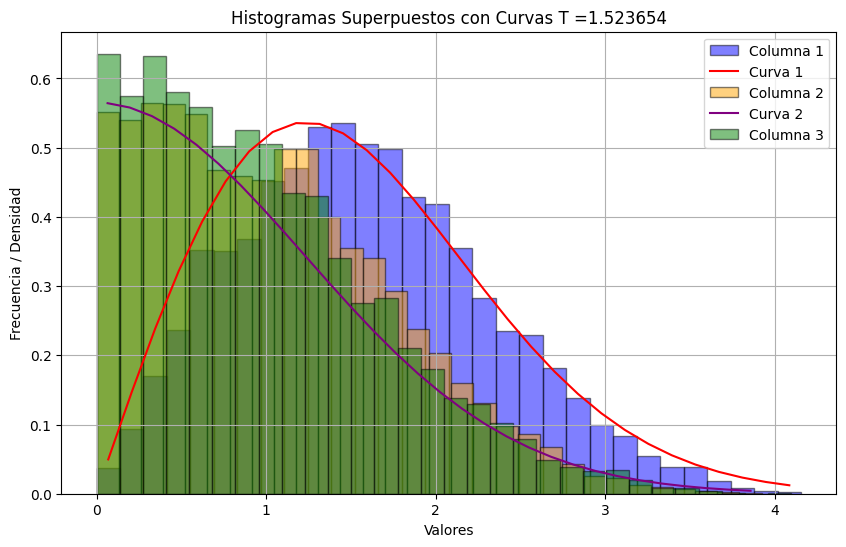

In [15]:
## EL HISTOGRAMA DE LAS TRES VELOCIDADES

#DEFINE AQUI LA TEMPERATURA
T=1.523654

import matplotlib.pyplot as plt
import numpy as np

# Función para leer los datos del archivo histograma.txt
def leer_datos_histograma(filename):
    columnas = []
    with open(filename, 'r') as file:
        for linea in file:
            valores = list(map(float, linea.strip().split()))  # Convertir cada valor en flotante
            if not columnas:
                columnas = [[] for _ in range(len(valores))]  # Inicializar listas para cada columna
            for i, valor in enumerate(valores):
                columnas[i].append(valor)
    return columnas

# Función para graficar los histogramas superpuestos con curvas
def graficar_histogramas_con_curvas(datos_columnas, curva1_funcion=None, curva2_funcion=None):
    colores = ['blue', 'orange', 'green']  # Colores para los histogramas
    etiquetas = ['Columna 1', 'Columna 2', 'Columna 3']  # Etiquetas para las leyendas

    plt.figure(figsize=(10, 6))
    for i, datos in enumerate(datos_columnas):
        conteo, bins, _ = plt.hist(datos, bins=30, alpha=0.5, color=colores[i], label=etiquetas[i], edgecolor='black', density=True)
        bins_centro = (bins[:-1] + bins[1:]) / 2  # Calcular el centro de cada barra del histograma

        # Para la primera columna, graficar la curva 1
        if curva1_funcion and i == 0:  
            curva1 = curva1_funcion(bins_centro)
            escala1 = max(conteo) / max(curva1)  # Escalar la curva para que coincida con el histograma
            plt.plot(bins_centro, curva1 * escala1, color='red', label='Curva 1')

        # Para la segunda columna, graficar la curva 2
        if curva2_funcion and i == 1:  
            curva2 = curva2_funcion(bins_centro)
            escala2 = max(conteo) / max(curva2)  # Escalar la curva para que coincida con el histograma
            plt.plot(bins_centro, curva2 * escala2, color='purple', label='Curva 2')

    plt.xlabel('Valores')
    plt.ylabel('Frecuencia / Densidad')
    plt.title(f'Histogramas Superpuestos con Curvas T ={T}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"HistogramaTotal_T{T}.png")
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo = "histograma.txt"  # Nombre del archivo
    datos_columnas = leer_datos_histograma(archivo)

    # Definir las funciones para las curvas
    def curva1(x):
        m = 1.0  # Masa
        k_B = 1.0  # Constante de Boltzmann
        return (1 / T) * x * np.exp(-m * x**2 / (2 * k_B * T))
        

    def curva2(x):
        M = 1.0  # Masa
        KB = 1.0  # Constante de Boltzmann
        return np.sqrt(M / (2 * np.pi * KB * T)) * np.exp(-M * x**2 / (2 * KB * T))

    # Graficar los histogramas con las curvas
    graficar_histogramas_con_curvas(datos_columnas, curva1_funcion=curva1, curva2_funcion=curva2)

#### Análisis de los histogramas:

Como podemos ver, se asemejas muchísimo a las curvas planteadas por el guión y podemos concluir que sí existe una concordancia tanto para vx, vy como el módulo.

### Programa 4: Linealidad Presión-Temperatura

Este programa lee el fichero apartado3.txt que se ha hecho a mano.

El fichero se construye para un mismo número N de partículas (en nuestro caso 20), variando el módulo de la velocidad inicial de cada partícula simulando así un aumento en temperatura.

El programa comprueba la linealidad entre los datos obtenidos de la presión y la temperatura calculada. Se hace una regresión lineal y se comprueba con el coeficiente de Pearson.

Necesita:
- apartado3.txt

Suelta:
- Linealidad_presion_temperatura.png

In [ ]:
# APARTADO 3: MOSTRAR QUE LA PRESIÓN ES LINEAL CON RESPECTO A LA TEMPERATURA.

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

# Función lineal para el ajuste
def recta(x, m, b):
    return m * x + b

# Leer el archivo y procesar los datos
def leer_datos(filename):
    datos_x = []
    datos_y = []
    
    with open(filename, 'r') as file:
        lineas = file.readlines()[2:]  # Ignorar las primeras dos líneas
        
        for linea in lineas:
            columnas = linea.strip().split()  # Dividir por espacios
            if len(columnas) >= 3:  # Asegurarse de que haya al menos 3 columnas
                datos_x.append(float(columnas[1]))  # Segunda columna (eje X)
                datos_y.append(float(columnas[2]))  # Tercera columna (eje Y)
    
    return np.array(datos_x), np.array(datos_y)

# Función para ajustar y graficar
def ajustar_y_graficar(filename):
    # Leer los datos
    x, y = leer_datos(filename)
    
    # Ajustar los datos a una recta
    parametros, _ = curve_fit(recta, x, y)
    m, b = parametros
    
    # Calcular el coeficiente de Pearson
    r, _ = pearsonr(x, y)
    
    # Generar la recta ajustada
    x_ajustado = np.linspace(min(x), max(x), 500)
    y_ajustado = recta(x_ajustado, m, b)
    
    # Graficar los datos y la recta ajustada
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Datos', alpha=0.7)
    plt.plot(x_ajustado, y_ajustado, color='red', label=f'Ajuste: y = {m:.2f}x + {b:.2f}')
    plt.xlabel('Presión (unidades reescaladas)')
    plt.ylabel('Temperatura (unidades reescaladas)')
    plt.title(f'Ajuste Lineal de los Datos\nCoeficiente de Pearson: r = {r:.6f}')
    plt.legend()
    plt.grid(True)
    plt.savefig("Linealidad_presion_temperatura.png")
    plt.show()

# Archivo de entrada
archivo = "apartado3.txt"

# Ejecutar la función
ajustar_y_graficar(archivo)

### Programa 5: Medir la fluctuación de las partículas.

#### 5.1 Programa para 1 sola partícula

Este programa coge los datos de fluctuacionuna.txt y plotea esos datos, que son la distancia de la partícula con respecto a su posición inicial.

Necesita:
- fluctuacionuna.txt

Suelta:
- fluctuacion_particula_{particula}.png

In [ ]:
# APARTADO 6: MOSTRAR LA FLUCTUACIÓN DE LAS POSICIONES.

#ELIGE LA PART

part=3

import matplotlib.pyplot as plt

def leer_fluctuacion(filename, particula):
    """
    Lee el archivo fluctuacion.txt y extrae los datos de una partícula específica.
    
    Args:
        filename (str): Nombre del archivo a leer.
        particula (int): Índice de la partícula a seleccionar (1-indexado).
    
    Returns:
        list: Lista con los valores de fluctuación de la partícula seleccionada en cada paso temporal.
    """
    fluctuaciones = []
    
    with open(filename, 'r') as file:
        paso_actual = 0
        for linea in file:
            linea = linea.strip()
            if linea:  # Si la línea no está vacía
                paso_actual += 1
                if paso_actual == particula:  # Selecciona la fila correspondiente a la partícula
                    fluctuaciones.append(float(linea))
            else:  # Si hay un salto de línea, reinicia el contador de filas
                paso_actual = 0
    
    return fluctuaciones

def graficar_fluctuacion(fluctuaciones):
    """
    Grafica los valores de fluctuación frente al paso temporal.
    
    Args:
        fluctuaciones (list): Lista con los valores de fluctuación.
    """
    pasos = range(1, len(fluctuaciones) + 1)  # Eje x: pasos temporales
    plt.figure(figsize=(8, 6))
    plt.plot(pasos, fluctuaciones, color='blue',linewidth=0.6, label='Fluctuación')
    plt.xlabel('Paso temporal')
    plt.ylabel('Fluctuación')
    plt.title(f'Fluctuación de la partícula_{part}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"fluctuacion_particula_{part}.png")
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo = "fluctuacionuna.txt"  # Nombre del archivo
    particula = part  # Cambia este valor para seleccionar otra partícula (1-indexado)
    
    # Leer los datos de fluctuación para la partícula seleccionada
    fluctuaciones = leer_fluctuacion(archivo, particula)
    
    # Graficar los datos
    graficar_fluctuacion(fluctuaciones)

#### 5.2 Fluctuación media.

Este programa usa fluctuaciontodas.txt y hace lo mismo programa anterior pero hace la media para cada valor.

Necesita:
- fluctuaciontodas.txt

Suelta:
- fluctuacion_media.png

In [ ]:
# APARTADO 6: FLUCTUACION MEDIA

import matplotlib.pyplot as plt

def leer_fluctuaciones(filename):
    """
    Lee las fluctuaciones desde un archivo de texto.

    Args:
        filename (str): Ruta del archivo a leer.

    Returns:
        list: Lista de fluctuaciones leídas del archivo.
    """
    fluctuaciones = []
    with open(filename, 'r') as file:
        for linea in file:
            fluctuaciones.append(float(linea.strip()))
    return fluctuaciones

def plot_fluctuaciones(fluctuaciones):
    """
    Genera un gráfico de fluctuaciones con respecto a los pasos temporales.

    Args:
        fluctuaciones (list): Lista de fluctuaciones.
    """
    pasos = range(1, len(fluctuaciones) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(pasos, fluctuaciones, color='blue', linewidth=0.6, label='Fluctuación Media')
    plt.xlabel('Paso Temporal')
    plt.ylabel('Fluctuación Media')
    plt.title('Fluctuación Media vs. Pasos Temporales')
    plt.legend()
    plt.grid(True)
    plt.savefig("fluctuacion_media.png")  # Guarda el gráfico como imagen
    plt.show()

if __name__ == "__main__":
    archivo = "fluctuaciontodas.txt"
    fluctuaciones = leer_fluctuaciones(archivo)
    plot_fluctuaciones(fluctuaciones)


### Programa 6: Medir la fluctuación de una partícula frente a otra.

#### 6.1

Este programa mide la distancia entre 2 particulas dadas por el fichero fluctuacion.txt

Necesita:
- Particula que usa
- Partícula de referencia
- fluctuacion.txt

Suelta:
- fluctuacion_part_{part}.png

In [ ]:
# APARTADO 7: MOSTRAR LA FLUCTUACIÓN DE LAS POSICIONES CON RESPECTO A OTRA PARTICULA.


#Selecciona la particula que quieres ver la fluctuación part1, y respecto a cual part2:
part1=1
part2=5

import matplotlib.pyplot as plt

def leer_fluctuacion(filename, particula):
    """
    Lee el archivo fluctuacion.txt y extrae los datos de una partícula específica.
    
    Args:
        filename (str): Nombre del archivo a leer.
        particula (int): Índice de la partícula a seleccionar (1-indexado).
    
    Returns:
        list: Lista con los valores de fluctuación de la partícula seleccionada en cada paso temporal.
    """
    fluctuaciones = []
    
    with open(filename, 'r') as file:
        paso_actual = 0
        for linea in file:
            linea = linea.strip()
            if linea:  # Si la línea no está vacía
                paso_actual += 1
                if paso_actual == particula:  # Selecciona la fila correspondiente a la partícula
                    fluctuaciones.append(float(linea))
            else:  # Si hay un salto de línea, reinicia el contador de filas
                paso_actual = 0
    
    return fluctuaciones

def graficar_fluctuacion(fluctuaciones):
    """
    Grafica los valores de fluctuación frente al paso temporal.
    
    Args:
        fluctuaciones (list): Lista con los valores de fluctuación.
    """
    pasos = range(1, len(fluctuaciones) + 1)  # Eje x: pasos temporales
    plt.figure(figsize=(8, 6))
    plt.plot(pasos, fluctuaciones, marker='o', color='blue', label='Fluctuación')
    plt.xlabel('Paso temporal')
    plt.ylabel('Fluctuación')
    plt.title(f'Fluctuación de la partícula {part1} respecto a la partícula {part2}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"fluctuacion_particula_{part1}_{part2}.png")
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo = f"fluctuacion.txt"  # Nombre del archivo
    particula = part1  # Cambia este valor para seleccionar otra partícula (1-indexado)
    
    # Leer los datos de fluctuación para la partícula seleccionada
    fluctuaciones = leer_fluctuacion(archivo, particula)
    
    # Graficar los datos
    graficar_fluctuacion(fluctuaciones)

#### 6.2 Vídeo de todas las fluctuaciones

Ahora se muestran todas las fluctuaciones con respecto a una partícula en concreto, via fluctuacion7.txt

Necesita:
- fluctuacion7.txt
- Particula de referencia

Suelta:
- fluctuaciones.mp4

In [ ]:
# APARTADO 7: VIDEO DE LAS FLUCTUACIONES


#CAMBIA LA PARTICULA QUE FIJAS

particula=5

import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

# Función para leer las fluctuaciones desde el archivo
def leer_fluctuaciones(filename):
    """
    Lee las fluctuaciones de las partículas desde un archivo.
    Cada fila representa una partícula, y un salto de línea indica un cambio de paso temporal.

    Args:
        filename (str): Nombre del archivo a leer.

    Returns:
        list: Lista de listas, donde cada sublista contiene la evolución temporal de una partícula.
    """
    fluctuaciones = []
    with open(filename, 'r') as file:
        particulas_actuales = []  # Almacena las fluctuaciones de las partículas en un paso temporal
        for linea in file:
            linea = linea.strip()
            if linea:  # Si la línea no está vacía
                datos = list(map(float, linea.split()))  # Convertir los valores a flotantes
                particulas_actuales.append(datos)
            else:  # Si encontramos un salto de línea, procesamos el paso temporal
                if particulas_actuales:
                    # Transponer para obtener la evolución temporal de cada partícula
                    if not fluctuaciones:
                        fluctuaciones = [[] for _ in range(len(particulas_actuales))]
                    for i, particula in enumerate(particulas_actuales):
                        fluctuaciones[i].extend(particula)
                    particulas_actuales = []  # Reiniciar para el siguiente paso temporal

        # Procesar el último paso si no está vacío
        if particulas_actuales:
            if not fluctuaciones:
                fluctuaciones = [[] for _ in range(len(particulas_actuales))]
            for i, particula in enumerate(particulas_actuales):
                fluctuaciones[i].extend(particula)

    return fluctuaciones

# Función para crear el video directamente
def crear_video(fluctuaciones, video_path, intervalo=500):
    """
    Crea un video donde cada frame muestra el gráfico de fluctuación de una partícula.

    Args:
        fluctuaciones (list): Lista de listas con las fluctuaciones de las partículas.
        video_path (str): Ruta donde se guardará el video.
        intervalo (int): Intervalo entre frames en milisegundos.
    """
    writer = FFMpegWriter(fps=1000 // intervalo)
    fig, ax = plt.subplots(figsize=(8, 6))

    with writer.saving(fig, video_path, dpi=100):
        for particula_idx, fluctuacion in enumerate(fluctuaciones):
            pasos = range(1, len(fluctuacion) + 1)
            ax.clear()
            ax.plot(pasos, fluctuacion, color='blue', linewidth=0.8, label=f'Partícula {particula_idx + 1}')
            ax.set_xlabel('Paso temporal')
            ax.set_ylabel('Fluctuación')
            ax.set_title(f'Fluctuación de la Partícula {particula_idx + 1} con respecto a la partícula {particula}')
            ax.legend()
            ax.grid(True)
            writer.grab_frame()

    print(f"Video guardado como '{video_path}'.")

# Ejemplo de uso
if __name__ == "__main__":
    archivo = "fluctuacion7.txt"  # Nombre del archivo de fluctuaciones
    video_path = f"fluctuaciones_{particula}.mp4"

    # Leer las fluctuaciones
    fluctuaciones = leer_fluctuaciones(archivo)

    # Crear el video directamente
    crear_video(fluctuaciones, video_path, intervalo=500)

### Programa 7 plot optimización

En este programa se leerán los ficheros: tiempoparalelizar.txt, tiempoSINPARALELIZAR.txt y tiempoCORES.txt

Se plotean los datos según su N y si pertenece a Joel o a mi pc.

El procesador de mi portátil es un intel i5 12450 H, con 8 cores y 12 hilos.

También cuento con una gráfica nvidia rtx 3050 en el portátil.



#### 7.1 Tiempo sin paralelizar

Ahora se cogen los datos de tiempoSINPARALELIZAR.txt y se plotean según que algoritmo se haya usado. La leyenda se lee así:

Si lo ha realizado mi portátil lleva PC delante, y si lo hace JOEL, llevará JOEL.

A continuación se dice el algoritmo usado. El algoritmo 'sin' es sin usar openMP y a través de visualstudio, es decir, único a mi PC. El 'omp' indica que solo ha sido compilado con openmp y que este se encargue. Si pone 'o1', 'o2', 'o3', u 'ofast' esto es que se ha usado dicho algoritmo a la hora de compilar el programa.

El programa que se usa es apartado1SIN.c

Necesita:

- tiempoSINPARALELIZAR.txt
- Modificar el tiempo total y el paso si es necesario en el título y el nombre del png.

Suelta:

- Gráfica con los tiempos sin paralelizar con los tiempos de optimización tanto en joel como en mi ordenador.


C:\Users\diego\AppData\Local\Temp\ipykernel_5740\1003920797.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  datos = pd.read_csv(ruta_archivo, delim_whitespace=True, skiprows=1, header=None)


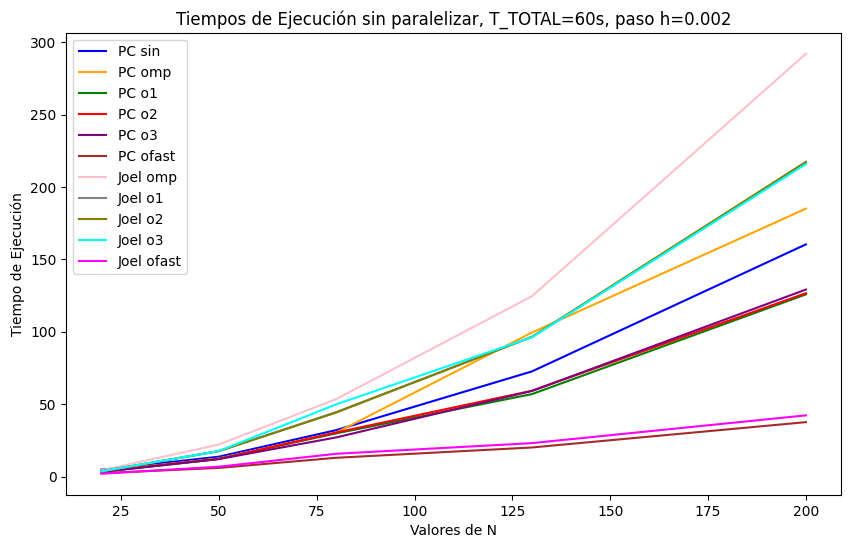

<Figure size 640x480 with 0 Axes>

In [9]:
# Tiempo sin paralelizar

import pandas as pd
import matplotlib.pyplot as plt
import os

# Ruta del archivo
ruta_archivo = 'c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_1_Lennard-Jonnes/Apartado_Optimizacion/tiempoSINPARALELIZAR.txt'

# Leer el archivo, saltando la primera línea
datos = pd.read_csv(ruta_archivo, delim_whitespace=True, skiprows=1, header=None)

# Extraer valores de X y tiempos de los algoritmos
valores_x = datos.iloc[:, 0]
algoritmos = datos.iloc[:, 1:]

# Cambiar nombres de los algoritmos
nombres_algoritmos = [
    'PC sin', 'PC omp', 'PC o1', 'PC o2', 'PC o3',
    'PC ofast', 'Joel omp', 'Joel o1', 'Joel o2', 'Joel o3', 'Joel ofast'
]
algoritmos.columns = nombres_algoritmos

# Paleta de colores distinguibles
colores = [
    'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta'
]

# Graficar los tiempos de cada algoritmo
plt.figure(figsize=(10, 6))
for i, nombre in enumerate(algoritmos.columns):
    plt.plot(valores_x, algoritmos[nombre], label=nombre, color=colores[i % len(colores)])

# Añadir leyenda, etiquetas y título
plt.legend()
plt.xlabel('Valores de N')
plt.ylabel('Tiempo de Ejecución')
plt.title('Tiempos de Ejecución sin paralelizar, T_TOTAL=60s, paso h=0.002')

# Mostrar y guardar la gráfica
plt.show()
ruta_salida = os.path.join(os.path.dirname(ruta_archivo), 'tiempos_sinparalelizar_T=60s_paso=0.002.png')
plt.savefig(ruta_salida)

Como podemos ver, el algoritmo de optimización Ofast es el que vence y por mucho a los demás.

Sin algoritmos, Joel es el que más tiempo tarda, por lo que el procesador de este será peor que el mío.

Me sorprende ver que los algoritmos O1, O2, O3 aunque sí optimizan el programa, lo hacen de una manera similar, estando los 3 casi en la misma curva. 

#### 7.2 Tiempo paralelizado

A continuación se usan los hilos para ver cual sería el mejor rendimiento. Uno podría pensar que cuantos más hilos mejor, pero no es el caso como veremos.

Necesita:
- tiempoparalelizar.txt

Suelta:
- tiempos_paralelizar_T=60s_paso=0.002.png

C:\Users\diego\AppData\Local\Temp\ipykernel_5740\2911557590.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  datos = pd.read_csv(ruta_archivo, delim_whitespace=True, skiprows=1, header=None)


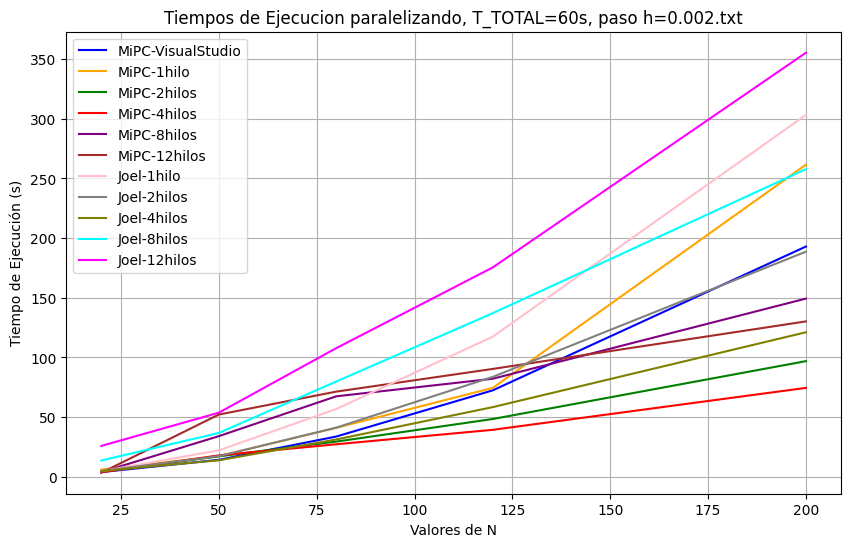

In [ ]:
# Tiempo paralelizado


import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo
ruta_archivo = 'tiempoparalelizar.txt'

# Leer el archivo, saltando la primera línea
datos = pd.read_csv(ruta_archivo, delim_whitespace=True, skiprows=1, header=None)

# Extraer valores de X y las curvas Y
valores_x = datos.iloc[:, 0]
curvas = datos.iloc[:, 1:]

# Modifica aquí los nombres de las curvas según tus necesidades
nombres_curvas = [
    'MiPC-VisualStudio', 'MiPC-1hilo', 'MiPC-2hilos', 'MiPC-4hilos', 'MiPC-8hilos', 'MiPC-12hilos',
    'Joel-1hilo', 'Joel-2hilos', 'Joel-4hilos', 'Joel-8hilos', 'Joel-12hilos'
]
curvas.columns = nombres_curvas[:curvas.shape[1]]

# Paleta de colores muy distintos
colores = [
    'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta'
]

# Graficar las curvas
plt.figure(figsize=(10, 6))
for i, nombre in enumerate(curvas.columns):
    plt.plot(valores_x, curvas[nombre], label=nombre, color=colores[i % len(colores)])

plt.legend()
plt.xlabel('Valores de N')
plt.ylabel('Tiempo de Ejecución (s)')
plt.title('Tiempos de Ejecucion paralelizando, T_TOTAL=60s, paso h=0.002.txt')
plt.grid(True)
plt.savefig('tiempos_paralelizar_T=60s_paso=0.002.png')
plt.show()

Aunque en un principio yo pensé que a mayor cantidad de hilos, mayor capacidad de procesar datos, esto no parece ser el caso.

Ya sea por cómo está estructurado el programa, los datos más bajos son mi pc con 4 hilos, seguido de 2 hilos y luego joel con 4 hilos. 

Que se alcance este mínimo en 4 hilos supongo a que se debe por la capacidad de paralelización de mi programa, es decir, el coste de pasar datos de un hilo a otro es mayor que un hilo lo procese todo.

Si bien podía haber incluído más comandos pragma y demás, creo que he hecho todo lo posible para paralelizar. Igual, si no hubiera metido esos comandos pragma, la diferencia entre usar más hilos hubiera sido menor, pero a mayor hilos, mayor potencia. Aún así, estos comandos creo que no ralentizan el programa, todo lo contrario, por lo que creo que aún así, con muchos más hilos el programa hubiera tardado más que con la configuracion previamente dicha.

#### 7.3 Ahora en Joel cambiamos los threads y los cores

Los comandos para hacerlo es:

- 1º editamos con vi
- 2º Ponemos las configs que queremos: Lo primero son los cores, threads. Se pone 0-4 y esto significa que se usan 5 cores.
    - configs=(
  "0-1,2"    # 2 cores (0-1) y 2 threads
  "0-3,1"
  "0-3,4"
  "0-3,8"
  "0-7,12" 
)
- 3º Luego compilamos con gcc normal:
    - gcc -fopenmp apartado1OMP.c -o apartado1 -lm
- 4º Hacemos el bucle for para que me lo saque todo
    - for config in "${configs[@]}"; do
        cores=$(echo $config | cut -d',' -f1)
        threads=$(echo $config | cut -d',' -f2)
  
        if [[ $cores == *-* ]]; then
            start=$(echo $cores | cut -d'-' -f1)
            end=$(echo $cores | cut -d'-' -f2)
            num_cores=$((end - start + 1))
        else
            num_cores=1
        fi
  
        printf "%-6s | %-7s | " "$num_cores" "$threads"

        export OMP_NUM_THREADS=$threads
        taskset -c $cores time -f "%e" ./apartado1
    done

- 5º Repetimos todo sin el paso 2


Necesita:
- tiempoCORES.txt

Suelta:
- tiempos_Cores_T=60s_paso=0.002.png

C:\Users\diego\AppData\Local\Temp\ipykernel_5740\3721757314.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  datos = pd.read_csv(datafile, delim_whitespace=True, skiprows=1, header=None)


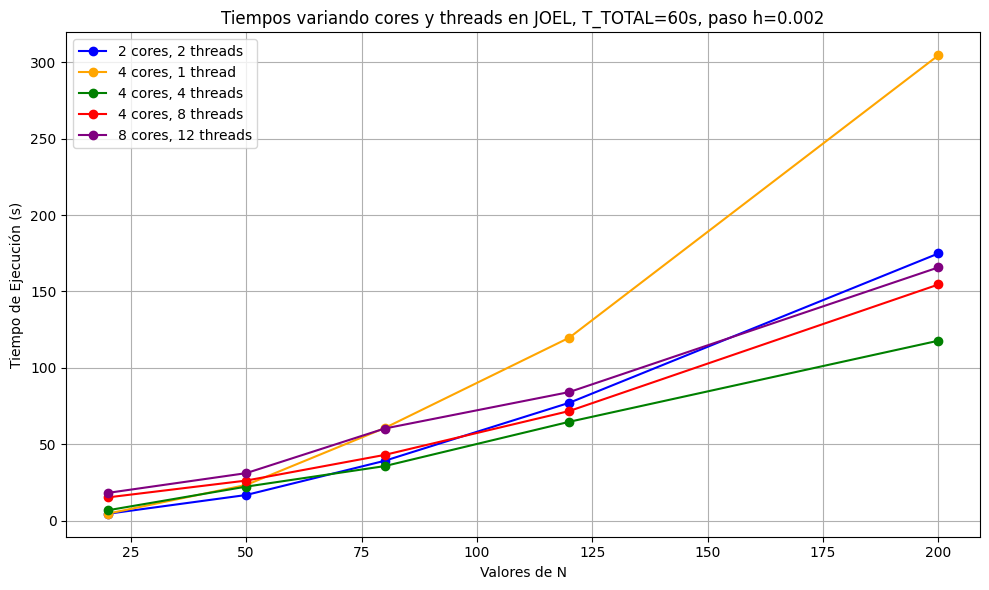

In [8]:
# Tiempo con cores

import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo
datafile = 'tiempoCORES.txt'

# Leer el archivo, saltando la primera línea
datos = pd.read_csv(datafile, delim_whitespace=True, skiprows=1, header=None)

# Extraer valores de X y las curvas Y
valores_x = datos.iloc[:, 0]
curvas = datos.iloc[:, 1:]

# Modifica aquí los nombres de las curvas según tus necesidades
nombres_curvas = [
    '2 cores, 2 threads', '4 cores, 1 thread', '4 cores, 4 threads', '4 cores, 8 threads', '8 cores, 12 threads'
][:curvas.shape[1]]
curvas.columns = nombres_curvas

# Paleta de colores muy distintos
colores = [
    'blue', 'orange', 'green', 'red', 'purple'
]

# Graficar las curvas
plt.figure(figsize=(10, 6))
for i, nombre in enumerate(curvas.columns):
    plt.plot(valores_x, curvas[nombre], label=nombre, color=colores[i % len(colores)], marker='o')

plt.legend()
plt.xlabel('Valores de N')
plt.ylabel('Tiempo de Ejecución (s)')
plt.title('Tiempos variando cores y threads en JOEL, T_TOTAL=60s, paso h=0.002')
plt.grid(True)
plt.tight_layout()
plt.savefig('tiempos_Cores_T=60s_paso=0.002.png')
plt.show()

De nuevo, no siempre con un número mayor de núcleos obtienes más capacidad de procesador. En Joel al aumentar los cores de nuevo se alcanza un mínimo con 4 cores y 4 hilos, por tanto podemos concluir que es la manera en la que mi programa está estructurado que el menor tiempo posible es con 4 equipos haciendo operaciones a la vez.

De nuevo, pienso a que se deben a los comandos pragma que permiten al programa trabajar más rápido con 4 hilos o cores.